## Work on Li Battery thermal runaway model

### Research - Scenario 1
- Three starting temperatures - 80 degrees C, 100 degrees C, 130 degrees C
- n = 0.2, 0.333, 0.5, 1.0
- Second term contribution omitted
- Parameters: 
    - $\frac{h_{1}}{C}$ = 150$^{\circ}$C
    - $A_{1}$ = 1.25 x $10^{17}$ $min^{-1}$
    - $E_{1}$= 1.4 eV
    - $\frac{h_{1}}{C}x_{fo}$ = 15$^{\circ}$C
    - Boltzmann Constant($k_{B}$) = 8.617 x $10^{-5}$ eV $K^{-1}$
- Equation
    - $\frac{dT}{dt}$ = $\frac{h_{1}}{C}x^{n}_{fo}A_{1}e^{-\frac{E_{1}}{k_{B}T}}$
    - $\frac{dx_{fo}}{dt}$ = $-x^{n}_{fo}A_{1}e^{-\frac{E_{1}}{k_{B}T}}$

In [1]:
#Python Code
#K = h1/C
import numpy as np

def dTdt(K, x_f, E_1, A_1, K_B, T0, n):
    return np.exp(-E_1/(K_B*T0))*A_1*K*np.power(x_f, n)

K = 150 #degrees Celsius
x_f = 0.1
E_1 = 1.4 #eV
A_1 = 1.25 * pow(10, 17)
K_B = 8.617 * pow(10, -5)
T0 = 80+273
n = [0.2, 0.333, 0.5, 1]

print(K, E_1, A_1, K_B, n[2], T0) #All vars
print(dTdt(K, x_f, E_1, A_1, K_B, T0, n[2]))






150 1.4 1.25e+17 8.617000000000001e-05 0.5 353
0.06087506081247796


-1.2147779552750027


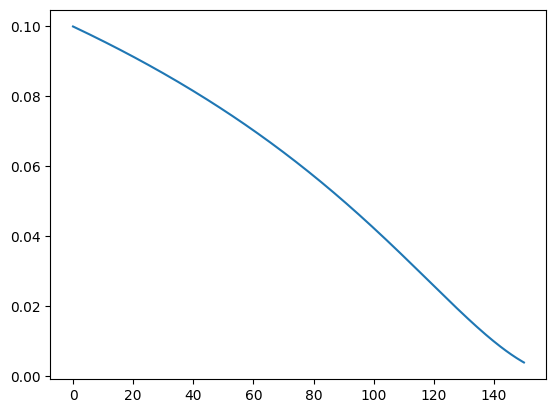

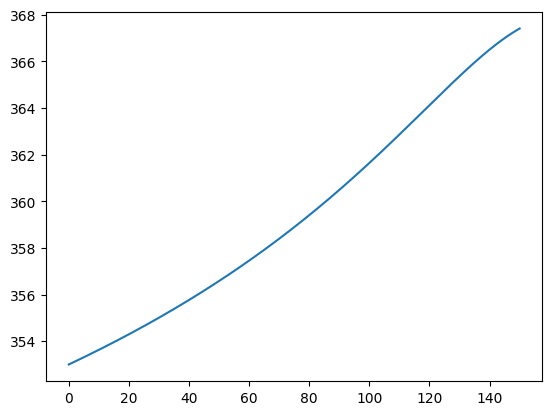

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

def vectorfield(w, t, p):
    """
    Defines the differential equations for the model.

    Arguments:
        w :  vector of the state variables:
                  w = [x1, T1]
        t :  time
        p :  vector of the parameters:
                  p = [A_1, E_1, K_B, n]

    """
    x1, T1 = w
    A_1, E_1, k_B, n, K = p

    # Create f = ('x1', 'T1')
    f = [-np.exp(-E_1/(k_B*T1))*A_1*(x1**n), K*np.exp(-E_1/(k_B*T1))*A_1*(x1**n)]
    return f


K = 150 #degrees Celsius
x_f = 0.1
E_1 = 1.4 #eV
A_1 = 1.25 * pow(10, 17)
k_B = 8.617 * pow(10, -5)
T0 = 80+273
n = 0.5

abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 150
numpoints = 250
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

p = [A_1, E_1, k_B, n, K]
w0 = [x_f, T0]

wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)
              
plt.figure(0)
plt.plot(t, wsol[:, 0])
plt.figure(1)
plt.plot(t, wsol[:, 1])
print(np.log10((wsol[:, 1][1] - wsol[:, 1][0])/t[1])) #Negative log again!!!

